In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

housing = datasets.load_boston()
housing

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
data = pd.DataFrame(housing['data'], columns=housing['feature_names'])
target = pd.DataFrame(housing['target'], columns=['Target'])

df = pd.concat([data, target], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df.info()

#CRIM: 지역 범죄율
#ZN: 주택지 비율
#INDUS: 상업적 비즈니스에 활용되지 않는 농지 면적
#CHAS: 경계선에 강이 있는지 여부
#NOX: 산화 질소 농도
#RM: 자택당 평균 방 개수
#AGE: 1940년 이전에 건설된 비율
#DIS: 5개의 보스턴 고용 센터돠의 거리에 따른 가중치 부여
#RAD: radial 고속도로와의 접근성 지수
#TAX: 10000달러당 재산세
#PTRATIO: 지역별 학생-교사 비율
#B: 지역의 흑인 수
#LSTAT: 빈곤층 비율

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
df['Target'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: Target, dtype: float64

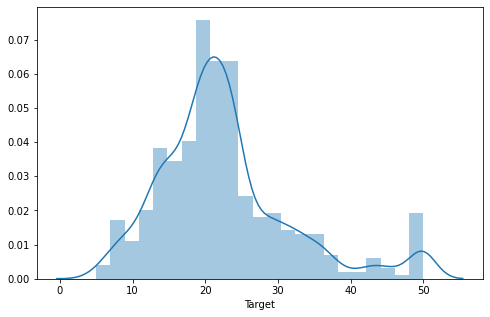

In [17]:
plt.figure(figsize=(8,5))
sns.distplot(df['Target']);

In [9]:
print('Skewness: %f' % df['Target'].skew()) #왜도: 비댕칭성
print('Kutosis: %f' % df['Target'].kurt()) #첨도: 완만함

Skewness: 1.108098
Kutosis: 1.495197


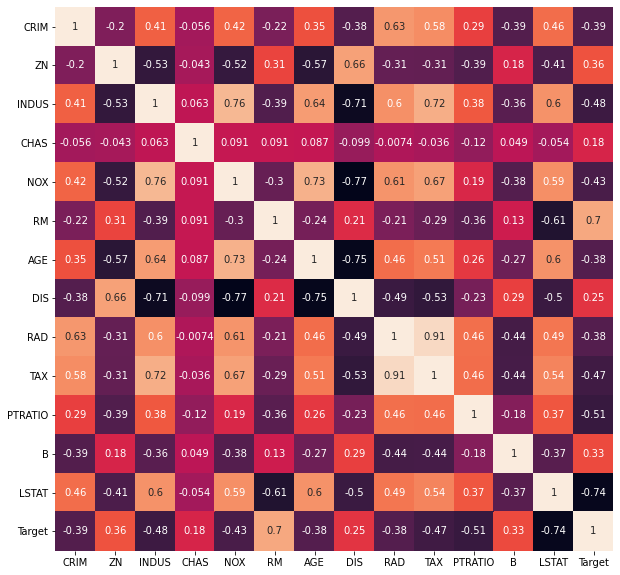

In [13]:
df_corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True, cbar=False);

In [71]:
col_names = df.columns.to_list()
list(enumerate(col_names))

[(0, 'CRIM'),
 (1, 'ZN'),
 (2, 'INDUS'),
 (3, 'CHAS'),
 (4, 'NOX'),
 (5, 'RM'),
 (6, 'AGE'),
 (7, 'DIS'),
 (8, 'RAD'),
 (9, 'TAX'),
 (10, 'PTRATIO'),
 (11, 'B'),
 (12, 'LSTAT'),
 (13, 'Target')]

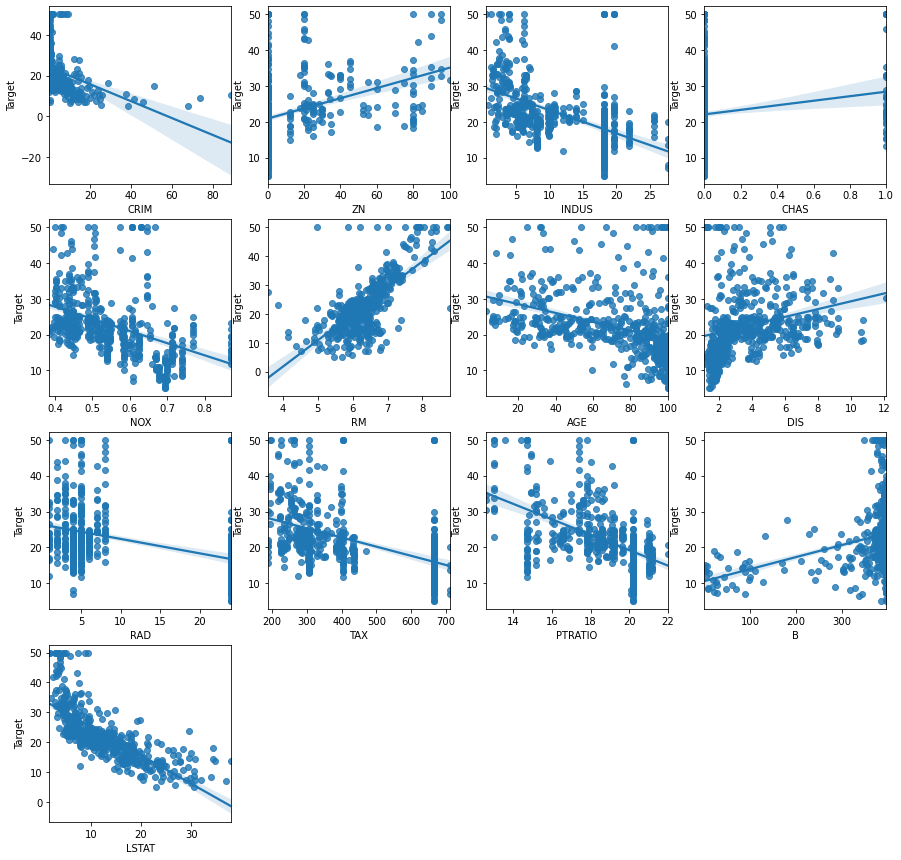

In [56]:
plt.figure(figsize=(15,15))
for idx, col in enumerate(col_names[:-1]):
    ax1=plt.subplot(4, 4, idx+1)
    sns.regplot(x=col, y=col_names[13], data=df, ax=ax1)
plt.show()

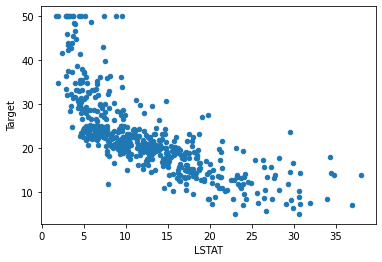

In [53]:
var = 'LSTAT'
df_RM = pd.concat([df['Target'], df[var]], axis=1)
df_RM.plot.scatter(x=var, y='Target');